In [1]:
import mysql.connector
import pandas as pd

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [19]:
data_base=conn.connect(
host="localhost",
user="root",
password="",
    
)
cur=data_base.cursor()
query='show databases'
cur.execute(query)
data_bases=cur.fetchall()
for data in data_bases:
    print(data)

('csv_db 12',)
('demo',)
('ht_df_demo',)
('information_schema',)
('mydb',)
('mysql',)
('netflix',)
('performance_schema',)
('phpmyadmin',)
('sql_live',)
('test',)
('world',)
('zomato',)


In [81]:
import mysql.connector
import pandas as pd

data_base = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="netflix"
)

cur = data_base.cursor()

query = 'SHOW TABLES'
cur.execute(query)

tables = cur.fetchall()
for table in tables:
    print(table)

cur.nextset()

cur = data_base.cursor()



('nflx',)


In [82]:
query = 'SELECT * FROM nflx'
cur.execute(query)

In [83]:
df = pd.DataFrame(cur.fetchall(), columns=cur.column_names)


In [84]:
df

,COL 1,COL 2,COL 3,COL 4,COL 5,COL 6,COL 7
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2018-02-05,262.00000,267.89999,250.02999,254.25999,254.25999,11896100
2,2018-02-06,247.69999,266.70001,245.00000,265.72000,265.72000,12595800
3,2018-02-07,266.57998,272.45001,264.32998,264.55999,264.55999,8981500
4,2018-02-08,267.07998,267.61999,250.00000,250.10000,250.10000,9306700
...,...,...,...,...,...,...,...
1005,2022-01-31,401.97000,427.70001,398.20001,427.14001,427.14001,20047500
1006,2022-02-01,432.95999,458.48001,425.54000,457.13000,457.13000,22542300
1007,2022-02-02,448.25000,451.98001,426.48001,429.48001,429.48001,14346000
1008,2022-02-03,421.44000,429.26001,404.27999,405.60000,405.60000,9905200


In [85]:
df = df.iloc[1:]

In [86]:
df = df.reset_index(drop=True)
df.columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]


In [87]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.00000,267.89999,250.02999,254.25999,254.25999,11896100
1,2018-02-06,247.69999,266.70001,245.00000,265.72000,265.72000,12595800
2,2018-02-07,266.57998,272.45001,264.32998,264.55999,264.55999,8981500
3,2018-02-08,267.07998,267.61999,250.00000,250.10000,250.10000,9306700
4,2018-02-09,253.85000,255.80000,236.11000,249.47000,249.47000,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.97000,427.70001,398.20001,427.14001,427.14001,20047500
1005,2022-02-01,432.95999,458.48001,425.54000,457.13000,457.13000,22542300
1006,2022-02-02,448.25000,451.98001,426.48001,429.48001,429.48001,14346000
1007,2022-02-03,421.44000,429.26001,404.27999,405.60000,405.60000,9905200


In [88]:
df.shape

(1009, 7)

In [89]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [90]:
df['Date'].dtype

dtype('O')

In [91]:
df['Date']=pd.to_datetime(df['Date'])

In [92]:
df.Date

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [93]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [94]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-02-05,262.00000,267.89999,250.02999,254.25999,254.25999,11896100,2018,2,5
1,2018-02-06,247.69999,266.70001,245.00000,265.72000,265.72000,12595800,2018,2,6
2,2018-02-07,266.57998,272.45001,264.32998,264.55999,264.55999,8981500,2018,2,7
3,2018-02-08,267.07998,267.61999,250.00000,250.10000,250.10000,9306700,2018,2,8
4,2018-02-09,253.85000,255.80000,236.11000,249.47000,249.47000,16906900,2018,2,9
...,...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.97000,427.70001,398.20001,427.14001,427.14001,20047500,2022,1,31
1005,2022-02-01,432.95999,458.48001,425.54000,457.13000,457.13000,22542300,2022,2,1
1006,2022-02-02,448.25000,451.98001,426.48001,429.48001,429.48001,14346000,2022,2,2
1007,2022-02-03,421.44000,429.26001,404.27999,405.60000,405.60000,9905200,2022,2,3


In [95]:
df=df.drop("Date",axis=1)

In [80]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,262.00000,267.89999,250.02999,254.25999,254.25999,11896100,2018,2,5
1,247.69999,266.70001,245.00000,265.72000,265.72000,12595800,2018,2,6
2,266.57998,272.45001,264.32998,264.55999,264.55999,8981500,2018,2,7
3,267.07998,267.61999,250.00000,250.10000,250.10000,9306700,2018,2,8
4,253.85000,255.80000,236.11000,249.47000,249.47000,16906900,2018,2,9
...,...,...,...,...,...,...,...,...,...
1004,401.97000,427.70001,398.20001,427.14001,427.14001,20047500,2022,1,31
1005,432.95999,458.48001,425.54000,457.13000,457.13000,22542300,2022,2,1
1006,448.25000,451.98001,426.48001,429.48001,429.48001,14346000,2022,2,2
1007,421.44000,429.26001,404.27999,405.60000,405.60000,9905200,2022,2,3


In [96]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       1009 non-null   object
 1   High       1009 non-null   object
 2   Low        1009 non-null   object
 3   Close      1009 non-null   object
 4   Adj Close  1009 non-null   object
 5   Volume     1009 non-null   object
 6   Year       1009 non-null   int64 
 7   Month      1009 non-null   int64 
 8   Day        1009 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 71.1+ KB


In [103]:
df['Open']=df['Open'].astype("float64")
df['High']=df['High'].astype("float64")
df['Low']=df['Low'].astype("float64")
df['Close']=df['Close'].astype("float64")
df['Adj Close']=df['Adj Close'].astype("float64")
df['Volume']=df['Volume'].astype("int64")

In [104]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03,1009.000000,1009.000000,1009.000000
mean,419.059669,425.320699,412.374040,419.000728,419.000728,7.570685e+06,2019.595639,6.540139,15.717542
std,108.537532,109.262960,107.555868,108.289999,108.289999,5.465535e+06,1.155997,3.428207,8.759264
min,233.919990,250.649990,231.229990,233.880000,233.880000,1.144000e+06,2018.000000,1.000000,1.000000
25%,331.489990,336.299980,326.000000,331.619990,331.619990,4.091900e+06,2019.000000,4.000000,8.000000
50%,377.769980,383.010010,370.880000,378.670010,378.670010,5.934500e+06,2020.000000,7.000000,16.000000
75%,509.130000,515.630000,502.529990,509.079980,509.079980,9.322400e+06,2021.000000,10.000000,23.000000
max,692.349970,700.989990,686.090020,691.690000,691.690000,5.890430e+07,2022.000000,12.000000,31.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
 6   Year       1009 non-null   int64  
 7   Month      1009 non-null   int64  
 8   Day        1009 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 71.1 KB


In [106]:
# df.to_csv('netflix .csv', index=False)

In [59]:
df=pd.read_csv("netflix .csv")

In [60]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,262.00000,267.89999,250.02999,254.25999,254.25999,11896100,2018,2,5
1,247.69999,266.70001,245.00000,265.72000,265.72000,12595800,2018,2,6
2,266.57998,272.45001,264.32998,264.55999,264.55999,8981500,2018,2,7
3,267.07998,267.61999,250.00000,250.10000,250.10000,9306700,2018,2,8
4,253.85000,255.80000,236.11000,249.47000,249.47000,16906900,2018,2,9
...,...,...,...,...,...,...,...,...,...
1004,401.97000,427.70001,398.20001,427.14001,427.14001,20047500,2022,1,31
1005,432.95999,458.48001,425.54000,457.13000,457.13000,22542300,2022,2,1
1006,448.25000,451.98001,426.48001,429.48001,429.48001,14346000,2022,2,2
1007,421.44000,429.26001,404.27999,405.60000,405.60000,9905200,2022,2,3


In [61]:
df=df.drop(['Adj Close'],axis=1)

In [62]:
df

,Open,High,Low,Close,Volume,Year,Month,Day
0,262.00000,267.89999,250.02999,254.25999,11896100,2018,2,5
1,247.69999,266.70001,245.00000,265.72000,12595800,2018,2,6
2,266.57998,272.45001,264.32998,264.55999,8981500,2018,2,7
3,267.07998,267.61999,250.00000,250.10000,9306700,2018,2,8
4,253.85000,255.80000,236.11000,249.47000,16906900,2018,2,9
...,...,...,...,...,...,...,...,...
1004,401.97000,427.70001,398.20001,427.14001,20047500,2022,1,31
1005,432.95999,458.48001,425.54000,457.13000,22542300,2022,2,1
1006,448.25000,451.98001,426.48001,429.48001,14346000,2022,2,2
1007,421.44000,429.26001,404.27999,405.60000,9905200,2022,2,3


In [63]:
X = df.drop('Close',axis=1)
y = df['Close']

In [64]:
X

,Open,High,Low,Volume,Year,Month,Day
0,262.00000,267.89999,250.02999,11896100,2018,2,5
1,247.69999,266.70001,245.00000,12595800,2018,2,6
2,266.57998,272.45001,264.32998,8981500,2018,2,7
3,267.07998,267.61999,250.00000,9306700,2018,2,8
4,253.85000,255.80000,236.11000,16906900,2018,2,9
...,...,...,...,...,...,...,...
1004,401.97000,427.70001,398.20001,20047500,2022,1,31
1005,432.95999,458.48001,425.54000,22542300,2022,2,1
1006,448.25000,451.98001,426.48001,14346000,2022,2,2
1007,421.44000,429.26001,404.27999,9905200,2022,2,3


In [65]:
y

0       254.25999
1       265.72000
2       264.55999
3       250.10000
4       249.47000
          ...    
1004    427.14001
1005    457.13000
1006    429.48001
1007    405.60000
1008    410.17001
Name: Close, Length: 1009, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
X_train.shape

(807, 7)

In [69]:
X_test.shape

(202, 7)

In [54]:
# from sklearn.preprocessing import StandardScaler
# sclr = StandardScaler()

In [55]:
# X_train = sclr.fit_transform(X_train)
# X_test = sclr.transform(X_test)

In [14]:
# import pickle
# pickle.dump(sclr,open('scaling.pkl','wb'))

In [70]:
X_train

,Open,High,Low,Volume,Year,Month,Day
983,612.98999,620.60998,611.23999,1625100,2021,12,30
973,598.17999,605.69000,584.51001,2866200,2021,12,15
47,317.29000,317.48999,308.23001,12046600,2018,4,13
527,358.92001,362.98001,344.79000,6036000,2020,3,11
643,488.19000,492.47000,485.08999,5727700,2020,8,25
...,...,...,...,...,...,...,...
767,525.00000,548.53997,518.28002,4136500,2021,2,23
72,324.89999,326.42001,322.79998,3577700,2018,5,18
908,584.89001,587.28002,575.55999,3457000,2021,9,14
235,330.95999,341.08999,328.51998,19500400,2019,1,11


In [71]:
import xgboost as xgb
from xgboost import XGBRegressor


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [73]:
lr = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()
svr = SVR()


In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [76]:
xgb.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
svr.fit(X_train,y_train)

SVR()

In [78]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_svr = svr.predict(X_test)

In [79]:
y_pred_lr

array([585.66753677, 634.80207971, 366.24908049, 431.90291869,
       415.23841723, 343.51223967, 501.00392718, 531.77560358,
       347.52441366, 333.4552572 , 481.62427214, 364.01039137,
       656.8336698 , 349.56113766, 357.57568903, 325.05440791,
       396.112481  , 258.64755932, 266.90366129, 541.90015611,
       598.30001562, 340.61151407, 271.41047253, 319.24311835,
       295.73552557, 362.91385189, 417.84739838, 541.26004272,
       502.26685996, 501.82771243, 605.37209196, 525.05665765,
       531.8111277 , 372.80257729, 356.2107813 , 273.53090484,
       351.3913508 , 537.87422467, 357.3315047 , 668.24768983,
       423.36569935, 364.09575351, 392.64361378, 393.90264899,
       414.56425686, 503.42745619, 447.29892295, 295.16351982,
       378.25312709, 551.91832217, 284.02325094, 313.07748198,
       330.66435465, 302.28165061, 350.58390629, 298.44169938,
       515.23779138, 485.00014622, 610.33923956, 488.76075212,
       379.90525133, 487.23967591, 307.22628021, 501.30

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

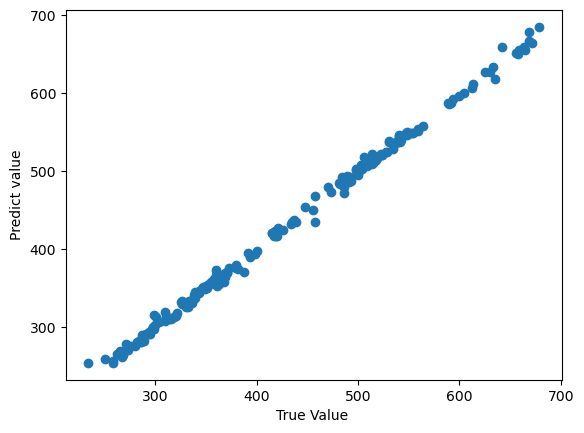

In [80]:
# plot a Scatter plot for prediction and y_test)
plt.scatter(y_test, y_pred_rf)
plt.xlabel('True Value ')
plt.ylabel('Predict value')
plt.show()

In [81]:
lr.score(X_test,y_test)

0.998777422890999

In [82]:
rf.score(X_test,y_test)

0.9977147203312573

In [83]:
xgb.score(X_test,y_test)

0.9967262029595592

In [84]:
svr.score(X_test,y_test)

0.28694804771945004

In [85]:
from sklearn.metrics import r2_score,mean_squared_error

In [86]:
r2_score(y_test,y_pred_lr)

0.998777422890999

In [87]:
r2_score(y_test,y_pred_rf)

0.9977147203312573

In [88]:
r2_score(y_test,y_pred_xgb)

0.9967262029595592

In [89]:
r2_score(y_test,y_pred_svr)

0.28694804771945004

In [36]:
mean_squared_error(y_test,y_pred_lr)

16.120322841603155

In [37]:
mean_squared_error(y_test,y_pred_rf)

30.84044870706162

In [38]:
mean_squared_error(y_test,y_pred_xgb)

43.16673755892318

In [39]:
mean_squared_error(y_test,y_pred_svr)

9401.965396678077

In [90]:
lr.predict([[603.359985,614.820007,250.029999,11896100,2018,2,5]])

array([326.40181686])

In [91]:
rf.predict([[603.359985,614.820007,250.029999,11896100,2018,2,5]])

array([398.8752005])

In [51]:
# xgb.predict([[603.359985,614.820007,250.029999,11896100,2018,2,5]])

In [49]:
input_data = [[603.359985, 614.820007, 250.029999, 11896100, 2018, 2, 5]]
input_df = pd.DataFrame(input_data, columns=['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day'])
prediction = xgb.predict(input_df)


In [50]:
prediction

array([461.277], dtype=float32)

In [32]:
svr.predict([[603.359985,614.820007,250.029999,254.259995,11896100,2018,2,5]])

array([417.20071886])

In [52]:
import pickle
pickle.dump(lr,open('model_lr.pkl','wb'))

In [92]:
pickle.dump(rf,open('model_rf.pkl','wb'))

In [54]:
pickle.dump(xgb,open('model_xgb.pkl','wb'))

In [55]:
pickle.dump(svr,open('model_svr.pkl','wb'))

In [56]:
model = pickle.load(open("model_rf.pkl", 'rb'))

In [58]:
model.predict([[603.359985,614.820007,250.029999,11896100,2018,2,5]])

array([397.9022978])

In [43]:

model.predict(sclr.transform([[603.359985, 614.820007, 250.029999, 254.259995, 11896100, 2018, 2, 5]]).reshape(1, -1))



array([269.7093904])

In [44]:
model.predict(sclr.transform([[603.359985, 614.820007, 250.029999, 254.259995, 11896100, 2018, 2, 5]]))


array([269.7093904])

In [69]:
import joblib

In [70]:
joblib.dump(rf, 'model.joblib')

['model.joblib']

In [71]:
model = joblib.load('model.joblib')


In [72]:
model.predict([[603.359985,614.820007,250.029999,254.259995,11896100,2018,2,5]])

array([687.5537945])

In [93]:
model = pickle.load(open("model_rf.pkl", 'rb'))

In [94]:
model.predict([[603.359985,614.820007,250.029999,11896100,2018,2,5]])

array([398.8752005])